In [1]:
import json
import sys
import pandas as pd
sys.path.append("../../")
from utils import model_utils
from utils import db_utils
from utils import feature_utils
from utils import iefp_data_utils
from utils import train_test_utils
import os
import datetime as dt

/opt/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [25]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
conn = db_utils.connect_to_db()

In [5]:
movements = db_utils.read_table(conn,'iefp','movement')
applications = db_utils.read_table(conn,'iefp','application')

In [7]:
applications.dcategoria.value_counts()

DESEMPREGADO-NOVO EMPREGO    106828
DESEMPREGADO-1Âº EMPREGO      13100
EMPREGADO                      4581
EMPREGADO A TEMPO PARCIAL       555
Name: dcategoria, dtype: int64

In [14]:
unemp_apps = applications[applications['dcategoria'].apply(lambda x: x[0] == 'D')]

In [16]:
unemp_apps.columns

Index([u'anomes', u'mo_data_movimento', u'cfreguesia', u'dfreguesia',
       u'ctipo_movimento', u'dtipo_movimento', u'ute_id', u'cnp_pretendida',
       u'dcnp_pretendida', u'cpp_pretendida', u'dcpp_pretendida',
       u'candidatura_data', u'cnacionalidade', u'dnacionalidade', u'sexo',
       u'chabilitacao_escolar', u'dhabilitacao_escolar', u'cdeficiencia',
       u'ddeficiencia', u'ccategoria', u'dcategoria',
       u'candidatura_motivo_inscricao', u'candidatura_rinsc',
       u'ute_estado_civil', u'dmotivo_inscricao',
       u'candidatura_int_tempo_nao_insc',
       u'candidatura_prof_pret_tempo_pratica',
       u'sit_anterior_prof_tempo_pratica', u'candidatura_local_trabalho',
       u'ute_plano_emprego', u'ute_plano_emprego_anterior',
       u'candidatura_carteira_prof', u'candidatura_formacao_prof',
       u'candidatura_qualificacao', u'reinscricao_ult_saida_data',
       u'reinscricao_ult_saida_motivo', u'carea_formacao_tabela_em_activo',
       u'darea_formacao_tabela_em_activ

In [23]:
unemp_apps['year'] = unemp_apps['anomes'].apply(lambda x: str(x)[0:4])
unemp_apps = unemp_apps[unemp_apps['year']!='2017']

/opt/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
count_by_year = pd.DataFrame(unemp_apps.groupby(['year']).ute_id.nunique())
count_by_year.reset_index(inplace=True)

/opt/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


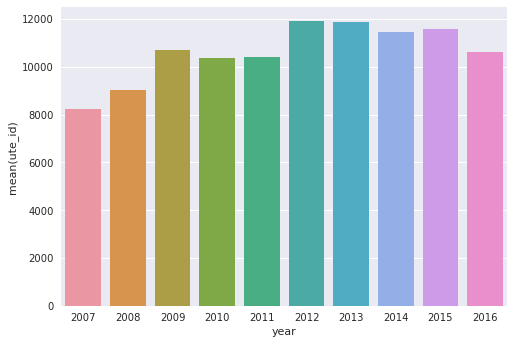

In [30]:
sns.barplot(x="year", y="ute_id", data=count_by_year)

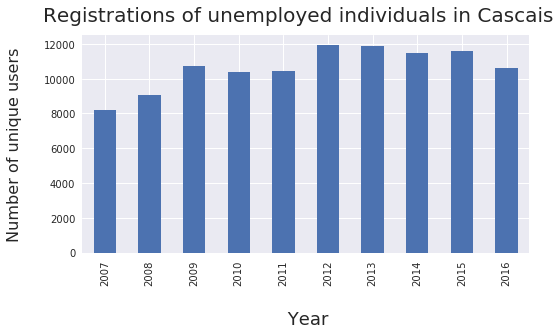

In [46]:
fig = plt.figure(figsize = (8,4))

unemp_apps.groupby(['year']).ute_id.nunique().plot(kind='bar')

fig.suptitle('Registrations of unemployed individuals in Cascais', fontsize=20)
plt.xlabel('\n Year', fontsize=18)
plt.ylabel('Number of unique users\n', fontsize=16)